In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Glebb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Glebb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
fake = pd.read_csv("fake.csv")
true = pd.read_csv("true.csv")

In [3]:
fake['isFake'] = 1
true['isFake'] = 0

In [4]:
df = pd.concat([fake, true], axis=0, ignore_index=True)
df.head()

,title,text,subject,date,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [5]:
df.shape

(44898, 5)

In [6]:
df.groupby('isFake').size()

isFake
0    21417
1    23481
dtype: int64

In [7]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
isFake     0
dtype: int64

In [8]:
def hist_by_fake(df, key, isFake):
    filtered_df = df[df['isFake'] == isFake]
    grouped_df = filtered_df.groupby(key).size()
    
    grouped_df.plot(kind='bar')
    plt.xlabel(key)
    plt.ylabel('Count')
    plt.show()

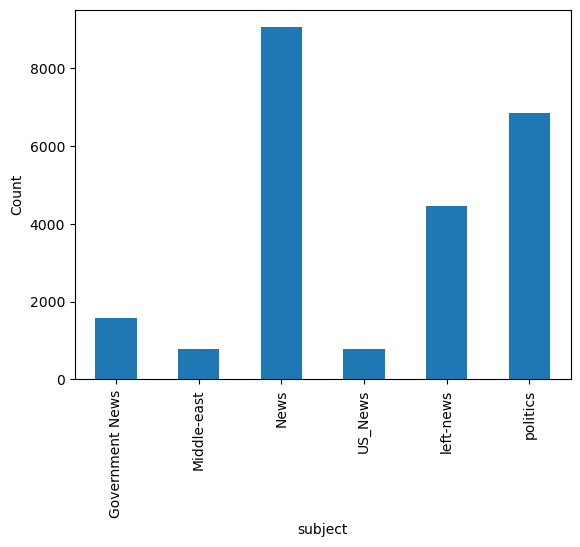

In [9]:
hist_by_fake(df, 'subject', 1)

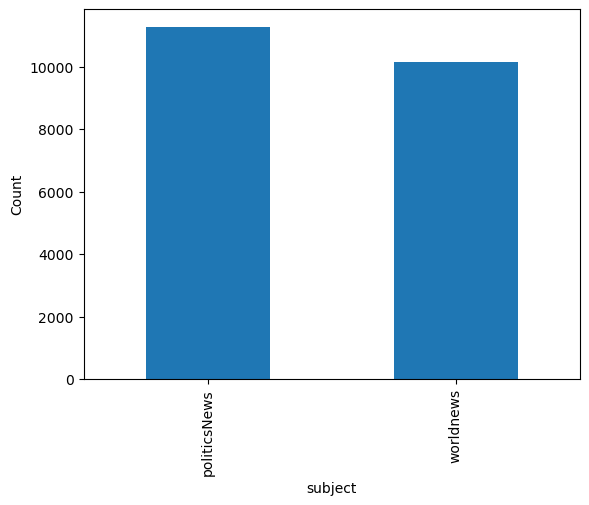

In [10]:
hist_by_fake(df, 'subject', 0)

In [11]:
df.drop(['subject','date'], axis=1, inplace=True)
df.head()

,title,text,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [12]:
y = df['isFake']

In [13]:
def tokenize_row_stopwords(row):
    stemmer = SnowballStemmer("english")
    nltk_stopwords = stopwords.words('english')
    tokenizer = nltk.tokenize.word_tokenize(row, language='english')
    tokens = [i for i in tokenizer if (i not in string.punctuation) and (i not in nltk_stopwords)]
    return [stemmer.stem(word) for word in tokens]

In [14]:
vect = HashingVectorizer(tokenizer=tokenize_row_stopwords, n_features=2**10, decode_error='ignore')

In [15]:
X_title = vect.transform(df['title'])
X_title.shape

(44898, 1024)

In [16]:
X_text = vect.transform(df['text'])
X_text.shape

(44898, 1024)

In [17]:
X = pd.concat([pd.DataFrame.sparse.from_spmatrix(X_text), pd.DataFrame.sparse.from_spmatrix(X_title)], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression(random_state=1)

In [20]:
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [21]:
prediction = model.predict(X_test)

In [22]:
score_a = accuracy_score(y_test, prediction)
print('Точность: ',score_a)

Точность:  0.9937639198218263


In [23]:
score_ra = roc_auc_score(y_test, prediction)
print('ROC-AUC: ',score_ra)

ROC-AUC:  0.9937456006653582


In [24]:
score_p = precision_score(y_test, prediction)
print('Precision: ',score_p)

Precision:  0.9940840904289034


In [25]:
score_r = recall_score(y_test, prediction)
print('Recall: ',score_r)

Recall:  0.9940840904289034
